In [1]:
import pandas as pd
from xgboost import XGBClassifier

In [2]:
%pwd

'C:\\Users\\User\\Downloads\\인공지능 경진대회\\09_cls_pipe-20220607T022001Z-001\\09_cls_pipe\\train\\train'

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Balanced_Label_Data.csv',
 'Final_Submission_by_XGBoost.csv',
 'final_train.csv',
 'Random Forest.ipynb',
 'train.csv',
 'train_data_preprocess.ipynb',
 'XGBoost Tuning - Optuna Example.ipynb',
 'XGBoost Tuning.ipynb',
 'XGBoost(feature_importance).ipynb',
 'XGBoost.ipynb']

# Read Train Data

In [4]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\인공지능 경진대회\\09_cls_pipe-20220607T022001Z-001\\09_cls_pipe\\train\\train\\train.csv')
df.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,out,0,2,2,0,2,0,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,out,0,0,0,3,0,3,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,out,0,4,4,4,4,5,4,4,5,...,5,5,6,5,6,6,6,5,6,4
3,out,0,6,5,5,6,5,6,6,5,...,6,6,7,7,5,6,5,5,7,7
4,out,0,3,0,0,3,0,0,3,3,...,3,3,3,3,3,3,3,3,3,3


# Read Test Data

In [5]:
test_df = pd.read_csv('C:\\Users\\User\\Downloads\\인공지능 경진대회\\09_cls_pipe-20220607T022001Z-001\\09_cls_pipe\\test\\test\\test.csv')
test_df.head()

,id,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,A8omWrwmLF,0,4,4,4,5,4,4,5,4,...,6,5,5,7,5,5,5,5,5,6
1,XEVCsLi6ps,0,8,7,10,10,10,10,10,10,...,14,14,11,13,11,13,13,11,11,11
2,cEVCc0xZkC,0,0,0,0,3,0,0,0,0,...,3,0,0,3,3,0,0,3,0,0
3,M2a2qkpvQ4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,Sts4cwqBEo,0,4,4,5,5,6,9,5,7,...,7,8,6,5,7,5,7,7,6,7


# Split X_train and y_train

In [6]:
train_data = df.iloc[:,1:]
train_data.head()

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,0,2,2,0,2,0,2,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,0,0,0,3,0,3,0,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,0,4,4,4,4,5,4,4,5,5,...,5,5,6,5,6,6,6,5,6,4
3,0,6,5,5,6,5,6,6,5,5,...,6,6,7,7,5,6,5,5,7,7
4,0,3,0,0,3,0,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [7]:
# train_x = train_data.iloc[:,:-1]
# train_x.head()

In [8]:
train_y = df.iloc[:,0]
train_y.head()

0    out
1    out
2    out
3    out
4    out
Name: leaktype, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_y, test_size=0.3, random_state=123)

# Train Model

In [10]:
#max_features
#n_estimators
#max_depth
#min_sample_split
#max_leaf_nodes

In [11]:
#xgb = XGBClassifier(n_estimators=800,learning_rate = 0.05,gamma = 3,max_depth = 5,scale_pos_weight = 4,random_state=123) #acc :0.884, f1: 0.73
#xgb = XGBClassifier(n_estimators=1000,learning_rate = 0.1,gamma = 3,max_depth = 5,scale_pos_weight = 4,random_state=123) #acc :0.883, f1: 0.73
#xgb = XGBClassifier(n_estimators=1000,learning_rate = 0.2,gamma = 3,max_depth = 5,scale_pos_weight = 4,random_state=123) #acc :0.886, f1: 0.74
xgb = XGBClassifier(n_estimators=800,learning_rate = 0.2,gamma = 3,max_depth = 5,scale_pos_weight = 4,random_state=123) #acc :0.886, f1: 0.74
#xgb = XGBClassifier(n_estimators=600,learning_rate = 0.2,gamma = 3,max_depth = 4,scale_pos_weight = 4,random_state=123) #acc :0.875, f1: 0.72
#xgb = XGBClassifier(n_estimators=500,learning_rate = 0.3,gamma = 3,max_depth = 3,scale_pos_weight = 3,random_state=123) #acc :0.869, f1: 0.71
#xgb = XGBClassifier(n_estimators=500,learning_rate = 0.3,gamma = 3,max_depth = 3,scale_pos_weight = 3,random_state=123) #acc :0.869, f1: 0.71
#xgb = XGBClassifier(learning_rate = 0.33,gamma = 3,max_depth = 3,scale_pos_weight = 3,random_state=123) #acc :0.7, f1: 0.41
#xgb = XGBClassifier(learning_rate = 0.3,gamma = 3,max_depth = 3,scale_pos_weight = 3,random_state=123) #acc :0.8, f1: 0.679
xgb.fit(X_train, y_train)

XGBClassifier(gamma=3, learning_rate=0.2, max_depth=5, n_estimators=800,
              objective='multi:softprob', random_state=123, scale_pos_weight=4)

# Prediction

In [12]:
y_pred = xgb.predict(X_test)

# Accuracy Evaluation

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.886


# F1 Score Evaluation

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1 score :', f1)

f1 score : 0.7461662921246164


In [16]:
from sklearn.metrics import classification_report

In [17]:
list(df['leaktype'].unique())

['out', 'in', 'normal', 'other', 'noise']

In [18]:
print(classification_report(y_test, y_pred, target_names=list(df['leaktype'].unique())))

              precision    recall  f1-score   support

         out       0.76      0.41      0.53       499
          in       0.84      0.85      0.85      1544
      normal       0.95      0.99      0.97      5386
       other       0.80      0.87      0.84      2113
       noise       0.74      0.44      0.55       538

    accuracy                           0.89     10080
   macro avg       0.82      0.71      0.75     10080
weighted avg       0.88      0.89      0.88     10080



# Feature Importance

<BarContainer object of 513 artists>

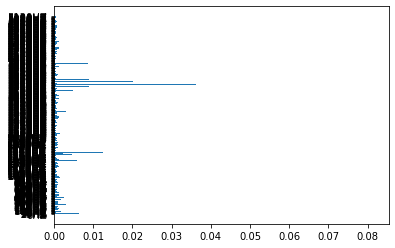

In [20]:
import matplotlib.pyplot as plt
plt.barh(train_data.columns, xgb.feature_importances_)

# SHAP Value

In [21]:
import shap

In [22]:
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer.shap_values(X_test)

100%|===================| 50387/50400 [12:23<00:00]        

In [ ]:
shap.plots.waterfall(explainer(X_train)[0])

  3%|=                   | 3356/117600 [00:53<30:04]       